## Install required packages

In [ ]:
!pip install nltk spacy --quiet

## Import required Libraries

In [ ]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
import spacy

nltk.download("stopwords")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Lowercasing.

In [ ]:
document = """
Attack on Titan (Japanese: 進撃の巨人, Hepburn: Shingeki no Kyojin, lit. 'The Advancing Giant') is a Japanese manga series
written and illustrated by Hajime Isayama. It is set in a world where humanity is forced to live in cities surrounded by three enormous walls
that protect them from gigantic man-eating humanoids referred to as Titans; the story follows Eren Yeager, who vows to exterminate the Titans after
they bring about the destruction of his hometown and the death of his mother. It was serialized in Kodansha's monthly magazine Bessatsu Shōnen Magazine
from September 2009 to April 2021, with its chapters collected in 34 tankōbon volumes. An anime television series was produced by Wit Studio
(seasons 1–3) and MAPPA (season 4). A 25-episode first season was broadcast from April to September 2013, followed by a 12-episode second season
broadcast from April to June 2017. A 22-episode third season was broadcast in two parts, with the first 12 episodes airing from July to October 2018
and the last 10 episodes airing from April to July 2019. A fourth and final season premiered in December 2020, airing 16 episodes in its first part.
A second part consisting of 12 episodes aired from January to April 2022, and the third and fourth parts aired in two specials; the first premiered in
March 2023, and the second premiered in November 2023.
Attack on Titan has become a critical and commercial success. By November 2023, the manga had over 140 million copies in circulation, making i
t one of the best-selling manga series of all time. It has won several awards, including the Kodansha Manga Award, the Attilio Micheluzzi Award, and
the Harvey Award.
Synopsis
The story of Attack on Titan centers on a civilization inside three circular walls. According to the knowledge propagated locally, it is the l
ast surviving vestige of human civilization. Its inhabitants, known as Eldians, have been led to believe that over one hundred years ago,
humanity was driven to the brink of extinction after the emergence of humanoid giants called Titans, who attack and eat humans on sight.
The last remnants of humanity retreated behind three concentric walls and enjoyed roughly a century of peace. Within the walls, the thought
of venturing outside is strongly frowned upon and discouraged. To combat Titans, the country's military employs Vertical Maneuvering Equipment
(VME), also called Omni-Directional Maneuvering Gear (ODM Gear): a set of waist-mounted grappling hooks and gas-powered propulsion enabling mobility
in three dimensions. Swords made of ultrahard steel are used in conjunction with the gear, and eventually rocket launcher–like weapons called Thunder
Spears are developed.
There are different types of Titans. Pure Titans are the weakest and most generic, whose behavior is easy to predict, making them easy to kill
Abnormal Titans are Pure Titans whose behavior is more difficult to predict, making them far more dangerous. The Nine Titans, also known as Titan Shifters
(Attack, Colossal, Armored, Female, Beast, Jaw, Cart, War Hammer, and Founding), are the strongest Titans; each is able to shift back and forth between
human and Titan form to access their Titan's abilities. Many Titan Shifters possess the ability to harden certain parts of their bodies at will,
typically in order to make them virtually impenetrable, or to strengthen their blows during combat.


Pure Titans are created by injecting Eldians with Titan spinal fluid. If a Pure Titan eats the human body of a person who possesses one of the
 Nine Titans, said Eldian will revert to human form and gain that Shifter's powers, whereupon they are cursed to live only 13 more years.
 If their powers are not inherited by another Eldian before their death, their powers will be inherited by an Eldian baby born shortly thereafter,
 regardless of distance or blood-relations. As the story progresses, the true nature of the Titans and the existence of civilization outside the
 walls is revealed."""


In [ ]:
def display(document: str):
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(document)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

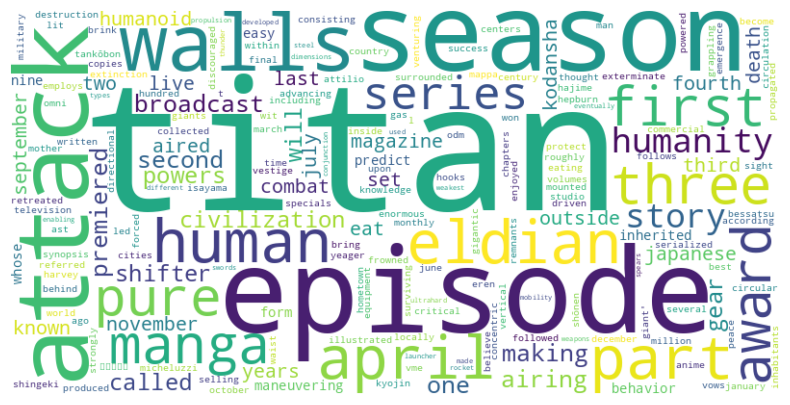

In [ ]:
lowercased_document = document.lower()
display(lowercased_document)

## Removing punctuation and special characters

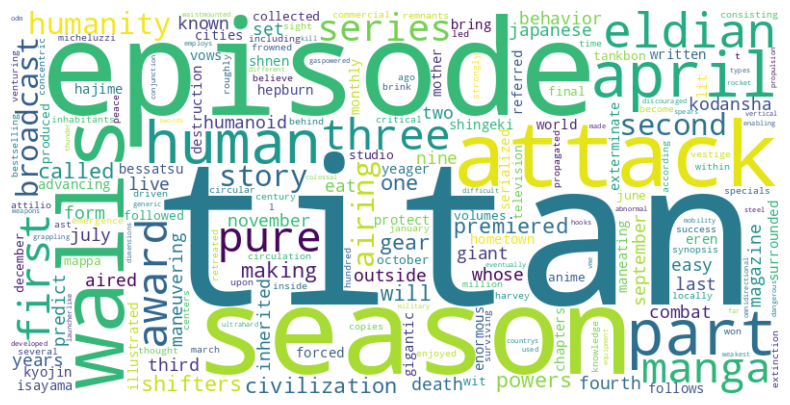

In [ ]:
cleaned_document = re.sub(r'[^a-zA-Z\s]', '', lowercased_document)
cleaned_document = re.sub(r' +', " ", cleaned_document)
display(cleaned_document)

## Tokenization.

In [ ]:
# Work tokenization using nltk.
from nltk.tokenize import word_tokenize

tokens = word_tokenize(cleaned_document)
print(f"Total tokens {len(tokens)}\n e.g. \n{tokens[: 5]}")

Total tokens 624
 e.g. 
['attack', 'on', 'titan', 'japanese', 'hepburn']


In [ ]:
# word tokenization using spacy
!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")
preprocessed_doc = nlp(cleaned_document)

In [ ]:
preprocessed_tokens = []
for token in preprocessed_doc:
  preprocessed_tokens.append(token)

print(f"Total tokens {len(preprocessed_tokens)}\n e.g. \n{preprocessed_tokens[: 5]}")

Total tokens 657
 e.g. 
[
, attack, on, titan, japanese]


## Stopword Removal

Total tokens after stopwords removal: 380


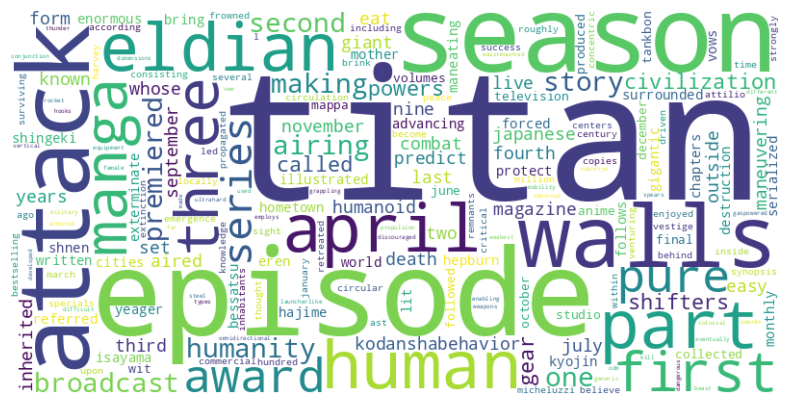

In [ ]:
# remove stopwords.
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stopwords_removed_doc = [word for word in tokens if word not in stop_words]

print(f"Total tokens after stopwords removal: {len(stopwords_removed_doc)}")
display(" ".join(stopwords_removed_doc))

## 5. Stemming & Lemmatization.

Stemming: Reduces words to their root form (e.g., "running" → "run").

Lemmatization: Converts words to their base form (e.g., "better" → "good").

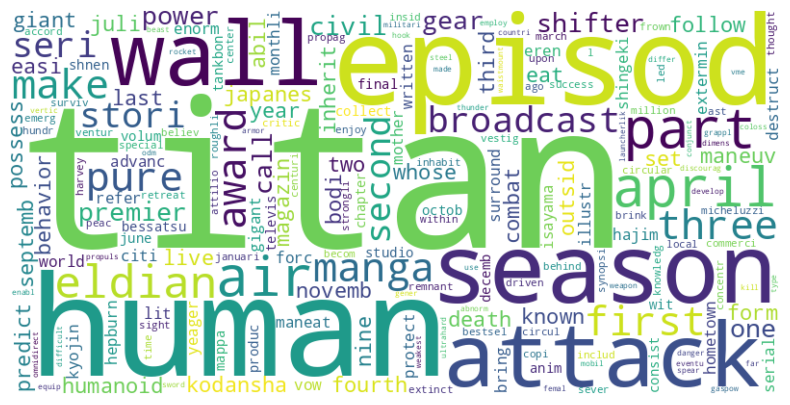

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(token) for token in stopwords_removed_doc]
display(" ".join(stemmed_tokens))

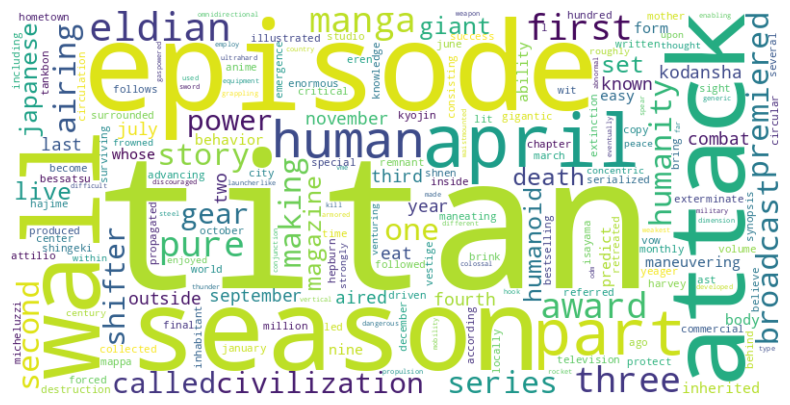

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stopwords_removed_doc]
display(" ".join(lemmatized_tokens))